In [1]:
import pandas as pd
from datetime import date
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('corona_updated.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.shape

(3696, 5)

In [3]:
df['date'] = pd.to_datetime(df['date'])
# , format='%m%d'

In [4]:
df.head()

,Country,TotalCases,TotalDeaths,TotalRecovered,date
0,Sri Lanka,1,0.0,0.0,2020-01-29
1,Finland,1,0.0,0.0,2020-01-29
2,United Arab Emirates,4,0.0,0.0,2020-01-29
3,Nepal,1,0.0,0.0,2020-01-29
4,Cambodia,1,0.0,0.0,2020-01-29


### Corona Virus Total Numbers by Day

In [5]:
df_gb = df.groupby(df['date'].dt.date).sum()

In [6]:
df_gb['case_roc'] = abs(df_gb['TotalCases'].pct_change())

In [7]:
df_gb['death_roc'] = abs(df_gb['TotalDeaths'].pct_change())

In [8]:
df_gb['recover_roc'] = abs(df_gb['TotalDeaths'].pct_change())

In [9]:
df_gb.head()

,TotalCases,TotalDeaths,TotalRecovered,case_roc,death_roc,recover_roc
date,,,,,,
2020-01-29,6171,133.0,0.0,NaN,NaN,NaN
2020-01-30,8247,170.0,0.0,0.336412,0.278195,0.278195
2020-01-31,9953,213.0,0.0,0.206863,0.252941,0.252941
2020-02-01,12027,259.0,0.0,0.208379,0.215962,0.215962
2020-02-02,14677,0.0,304.0,0.220338,1.000000,1.000000


Text(0.5, 0, 'Date')

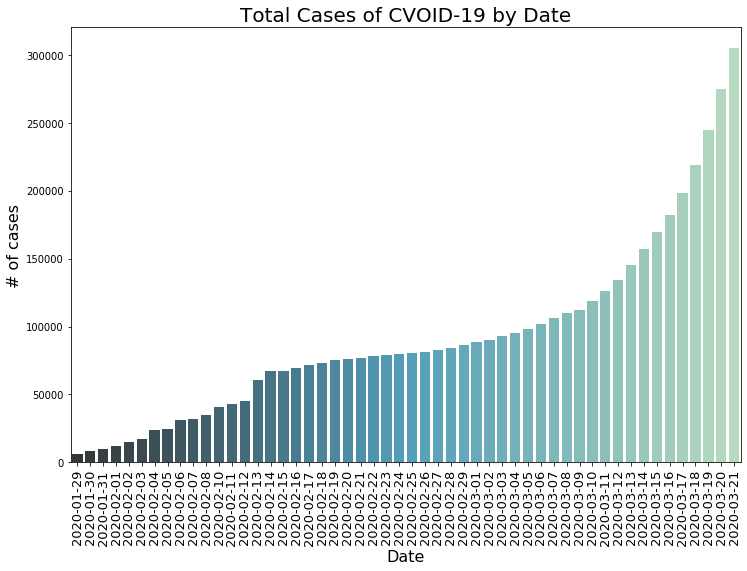

In [10]:

plt.figure(figsize=(12,8))
sns.barplot(df_gb.index, df_gb['TotalCases'], palette="GnBu_d")
plt.xticks(rotation=90, fontsize=13)
plt.title('Total Cases of CVOID-19 by Date', fontsize=20)
plt.ylabel('# of cases', fontsize=16)
plt.xlabel('Date', fontsize=16)

Text(0.5, 0, 'Date')

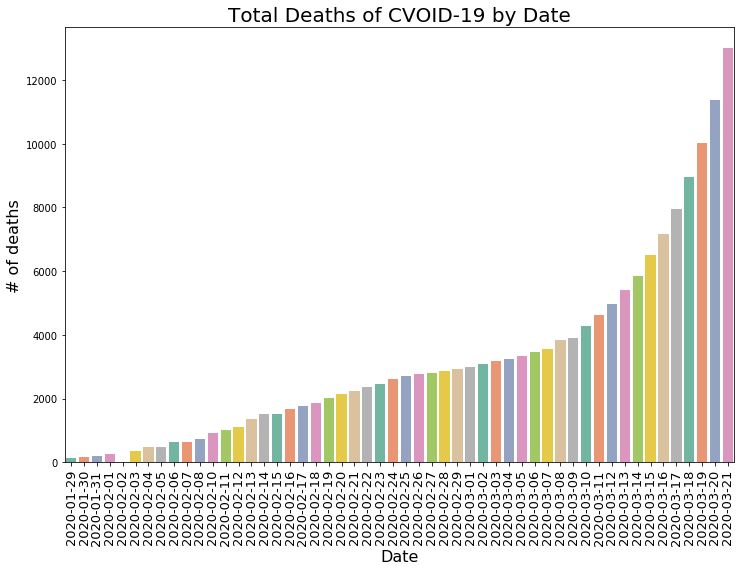

In [11]:
plt.figure(figsize=(12,8))
sns.barplot(df_gb.index, df_gb['TotalDeaths'], palette='Set2')
plt.xticks(rotation=90, fontsize=13)
plt.title('Total Deaths of CVOID-19 by Date', fontsize=20)
plt.ylabel('# of deaths', fontsize=16)
plt.xlabel('Date', fontsize=16)

### Rate of Change

Text(0.5, 0, 'Date')

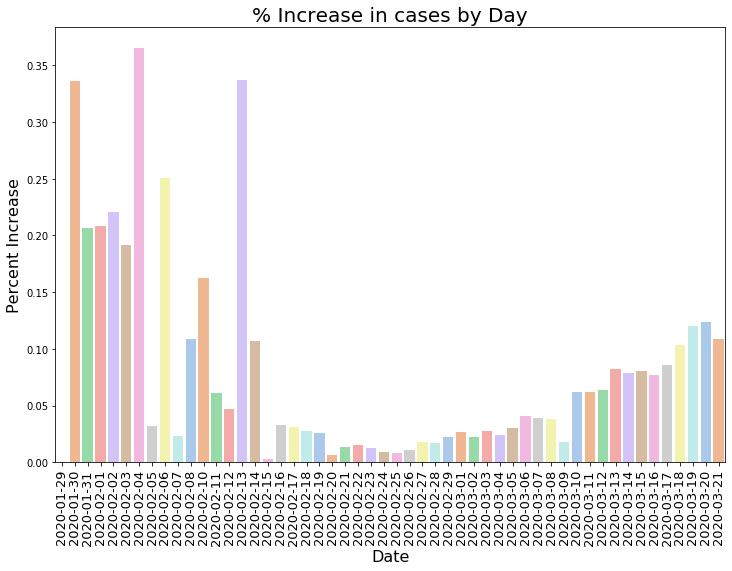

In [12]:
plt.figure(figsize=(12,8))
sns.barplot(df_gb.index, df_gb['case_roc'], palette='pastel')
plt.xticks(rotation=90, fontsize=13)
plt.title('% Increase in cases by Day', fontsize=20)
plt.ylabel('Percent Increase', fontsize=16)
plt.xlabel('Date', fontsize=16)

Text(0.5, 0, 'Date')

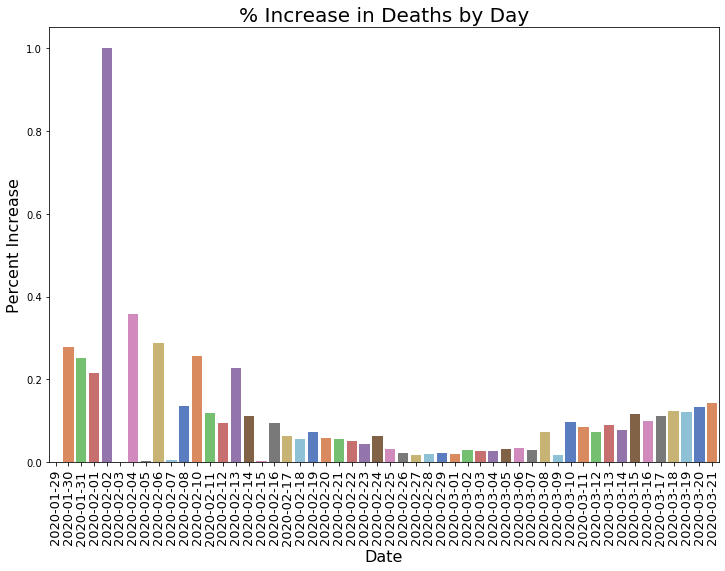

In [13]:
plt.figure(figsize=(12,8))
sns.barplot(df_gb.index, df_gb['death_roc'], palette='muted')
plt.xticks(rotation=90, fontsize=13)
plt.title('% Increase in Deaths by Day', fontsize=20)
plt.ylabel('Percent Increase', fontsize=16)
plt.xlabel('Date', fontsize=16)

Text(0.5, 0, 'Date')

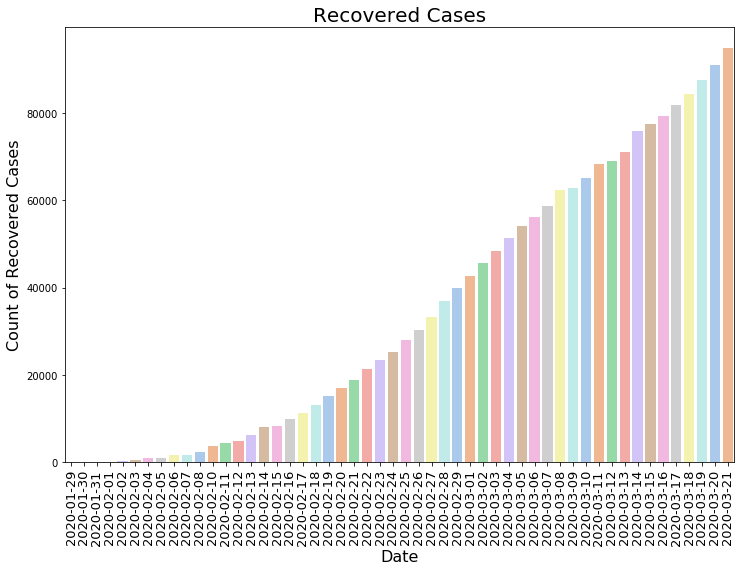

In [14]:
plt.figure(figsize=(12,8))
sns.barplot(df_gb.index, df_gb['TotalRecovered'], palette='pastel')
plt.xticks(rotation=90, fontsize=13)
plt.title('Recovered Cases', fontsize=20)
plt.ylabel('Count of Recovered Cases', fontsize=16)
plt.xlabel('Date', fontsize=16)

Text(0.5, 0, 'Date')

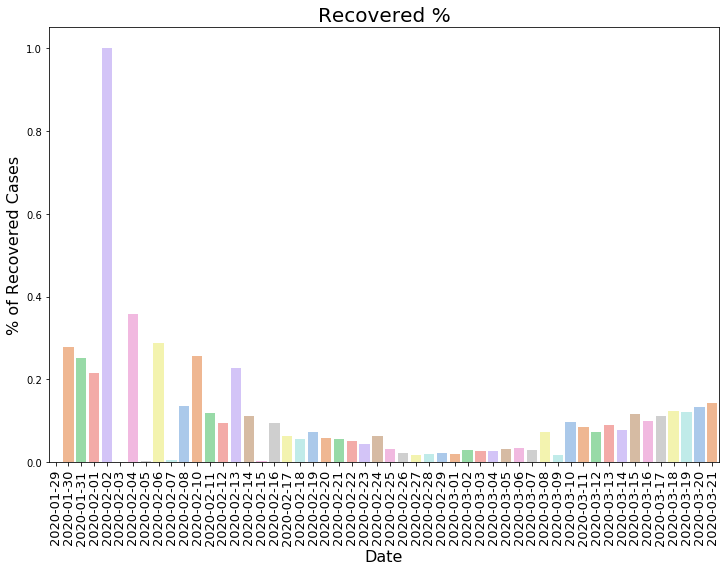

In [15]:
plt.figure(figsize=(12,8))
sns.barplot(df_gb.index, df_gb['recover_roc'], palette='pastel')
plt.xticks(rotation=90, fontsize=13)
plt.title('Recovered %', fontsize=20)
plt.ylabel('% of Recovered Cases', fontsize=16)
plt.xlabel('Date', fontsize=16)